In [ ]:
# Importing the pandas library
# the read_csv() function to load the data.

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/Copy of bank-additional-full.csv', sep=';')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#encoding the variable as 1 for 'yes' and 0 for 'no'.
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)


In [ ]:
#Return the first 5 rows by default.
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Aggregate Conversion Rates
First, we are going to look at the aggregate conversion rate. We can calculate
this metric by dividing the total number of clients subscribed to a term deposit
by the total number of clients in the data. Since we have already encoded the
output variable as 1 for those who have converted and 0 for those who have
not, in a column named conversion, we can simply sum over this column to get
the total number of conversions.



In [ ]:
# total number of conversions
df.conversion.sum()


4640

In [ ]:
# total number of clients in the data (= number of rows in the data)
df.shape[0]

41188

In [ ]:
print('conversion rates: %0.2f%%' % (df.conversion.sum() / df.shape[0]* 100.0))

conversion rates: 11.27%


## Conversion rates by age
Aggregate conversion rate tells us the overall performance of our marketing
campaign. However, it does not give us that much insight. When we are
reporting and tracking the progress of marketing efforts, we typically would
want to dive deeper into the data and break down the customer base into
multiple segments and compute KPIs for individual segments. We will first
break our data into smaller segments by age and see how the conversion rates
differ by different age groups.

In [ ]:
df.groupby(by='age')['conversion'].count() * 100.0

age
17      500.0
18     2800.0
19     4200.0
20     6500.0
21    10200.0
       ...   
91      200.0
92      400.0
94      100.0
95      100.0
98      200.0
Name: conversion, Length: 78, dtype: float64

In [ ]:
df.groupby(by='age')['conversion'].sum() 

age
17     2
18    12
19    20
20    23
21    29
      ..
91     0
92     3
94     0
95     0
98     2
Name: conversion, Length: 78, dtype: int64

In [ ]:
#we are using the groupby function to calculate conversion rates by each age.
# the sum ()function, to get the total number of conversions by each age.
#  count the number of records in each age group by using the count function.

conversions_by_age = df.groupby(by='age')['conversion'].sum() / df.groupby(by='age')['conversion'].count() * 100.0
print(conversions_by_age)

age
17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
         ...    
91      0.000000
92     75.000000
94      0.000000
95      0.000000
98    100.000000
Name: conversion, Length: 78, dtype: float64


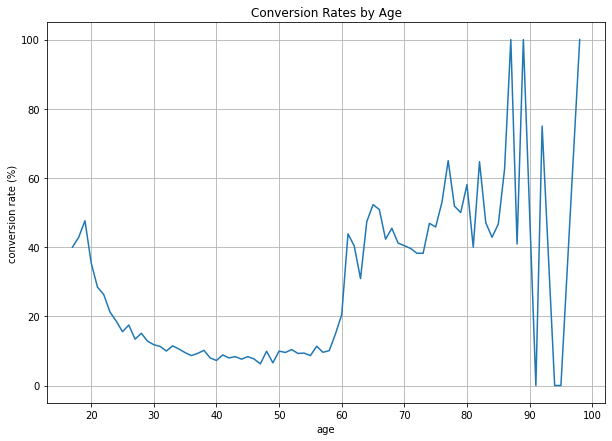

In [ ]:
#Ploting to visualize conversion rates
import matplotlib.pyplot as plt

ax = conversions_by_age.plot(
grid=True,
figsize=(10, 7),
title='Conversion Rates by Age'
)
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()


In [ ]:
# we group bank clients into six different groups, based on their age

df['age_group'] = df['age'].apply(
lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
else '[60, 70)' if x < 70 else '70+'
)


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[30, 40)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[40, 50)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"


In [ ]:
# To calculate the conversion rates for these newly created age groups
conversions_by_age_group = df.groupby(
by='age_group'
)['conversion'].sum() / df.groupby(
by='age_group'
)['conversion'].count() * 100.0


In [ ]:
print(conversions_by_age_group)

age_group
70+         47.121535
[18, 30)    16.263891
[30, 40)    10.125162
[40, 50)     7.923238
[50, 60)    10.157389
[60, 70)    34.668508
Name: conversion, dtype: float64


Text(0, 0.5, 'conversion rate (%)')

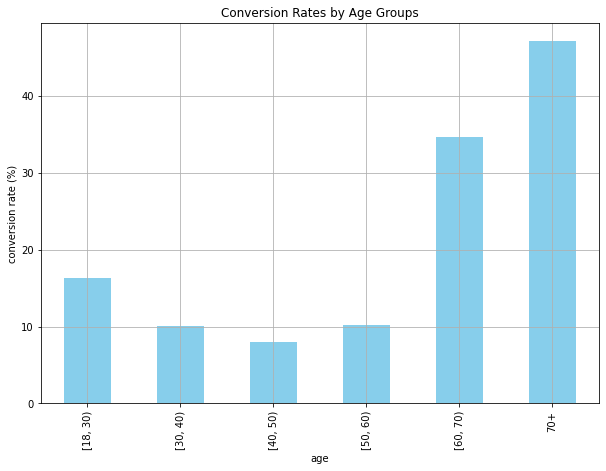

In [ ]:
#The code to build this bar plot looks like the following:
ax = conversions_by_age_group.loc[
['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
kind='bar',
color='skyblue',
grid=True,
figsize=(10, 7),
title='Conversion Rates by Age Groups'
)
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

## Conversions versus non-conversions
One other thing we can look at is the demographic differences between the
converted clients and non-converted clients. This type of analysis can help us
identify what differentiates converted groups from non-converted groups in
our marketing campaigns and help us understand our target clients better and
what types of customers respond better to our marketing efforts. In this
exercise, we will compare the distributions of the marital status among the
conversions and non-conversions groups.



In [ ]:
#counting the number of conversions and non-conversions for each marital status.

conversions_by_marital_status_df = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status_df


conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


### Conversions by marital status


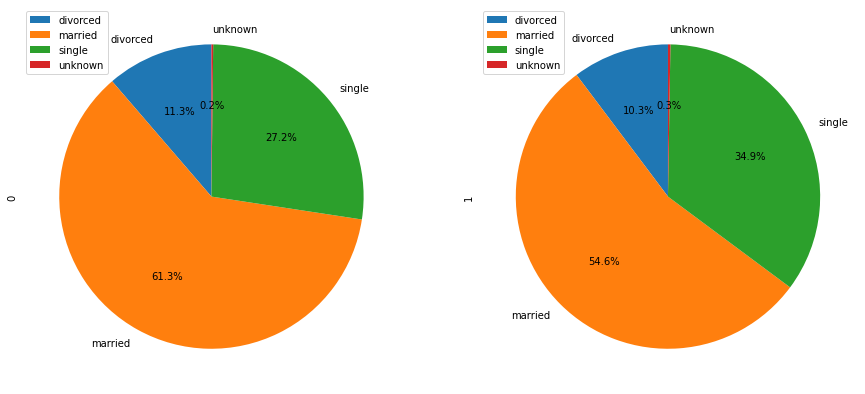

In [ ]:
#representing the above pivot table using a pie chart

conversions_by_marital_status_df.plot(
kind='pie',
figsize=(15, 7),
startangle=90,
subplots=True,
autopct=lambda x: '%0.1f%%' % x
)
plt.show()

## Conversions by age and marital status 
So far, we have aggregated our data by one criterion. However, there are
cases where you want to group the data by more than one column. In this
section, we will discuss how we can analyze and report conversion rates by
more than one criterion. As an exercise, we will use age groups that we have
built in the previous section and the marital status as the two columns to group
by



In [ ]:
#using age groups and marital status to filter the conversions

age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)
age_marital_df1 = df.groupby(by='age_group')['conversion'].count()

age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,64.0,151.0,6.0,0.0
"[18, 30)",12.0,158.0,751.0,1.0
"[30, 40)",128.0,897.0,684.0,6.0
"[40, 50)",126.0,575.0,130.0,3.0
"[50, 60)",119.0,533.0,44.0,1.0
"[60, 70)",27.0,218.0,5.0,1.0


In [ ]:
age_marital_df1

age_group
70+           469
[18, 30)     5669
[30, 40)    16938
[40, 50)    10526
[50, 60)     6862
[60, 70)      724
Name: conversion, dtype: int64

In [ ]:
# dividing the values of age_marital_df by age_marital_df1 row wise

age_marital_df2=age_marital_df.divide(age_marital_df1, axis=0)

In [ ]:
age_marital_df2

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18, 30)",0.002117,0.027871,0.132475,0.000176
"[30, 40)",0.007557,0.052958,0.040383,0.000354
"[40, 50)",0.011970,0.054627,0.012350,0.000285
"[50, 60)",0.017342,0.077674,0.006412,0.000146
"[60, 70)",0.037293,0.301105,0.006906,0.001381


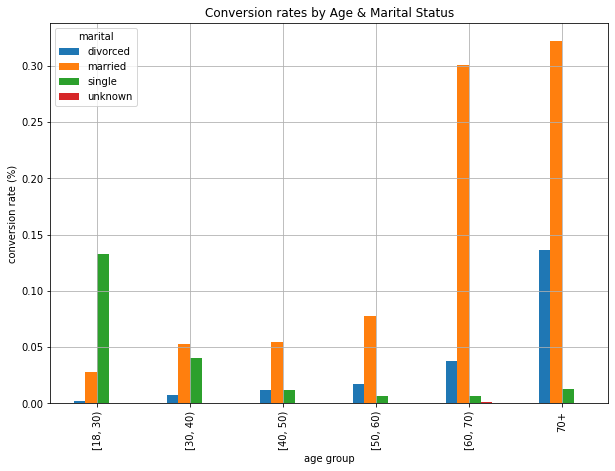

In [ ]:
# representing the above dataframe in a bar plot

ax = age_marital_df2.loc[
['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
kind='bar',
grid=True,
figsize=(10,7)
)
ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')
plt.show()


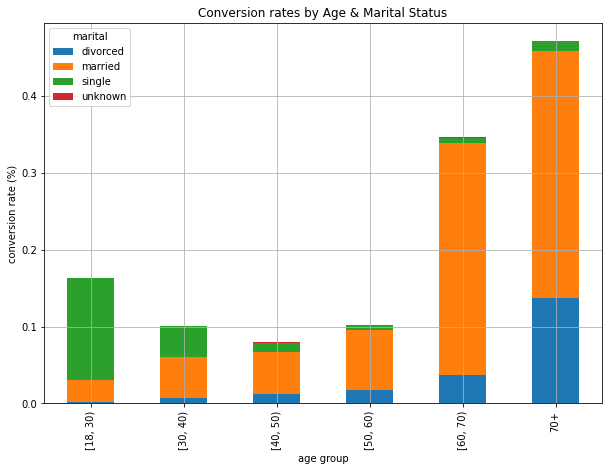

In [ ]:
# representing the dataframe age_marital_df2 in a stacked bar plot 

ax = age_marital_df2.loc[
['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
kind='bar',
stacked=True,
grid=True,
figsize=(10,7)
)
ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')
plt.show()